[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lectures-python/Python_lectures_HW/blob/main/HW/Task3_dmrf_OOP.ipynb)

In [1]:
import requests
import numpy as np 
import pandas as pd

#импортируем библиотеку datetime для работы с датами 
import datetime as dt
from datetime import datetime, date

#Задаем некоторые опции библиотеки pandas, которые настраивают вывод 
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', None)

#импортируем библиотеки matplotlib и seaborn для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
class DomIdLoader:
    def __init__(self,amount,limit_):
        self.amount = amount
        self.urls = []
        self.objids = []
        self.limit_ = limit_


    def get_ids(self):
      for i in range(0,self.amount,self.limit_):
          self.urls.append(f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={i}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0')

      for i in self.urls:
        object_data = requests.get(i).json().get('data').get('list')
        for k in object_data:
            self.objids.append(k.get('objId'))
      return self.objids



In [3]:
class ObjectInfoExtractor:

    regions = requests.get('https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/dictionary/regions').json()
    regions_dict = dict((region['id'], region['name']) for region in regions)

    def __init__(self, ids):
        self.ids = ids
        self.list = []

    def load_data(self):
        for i in self.ids:
          self.list.append(requests.get(f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{i}').json().get('data'))

    def df_converter(self):
      self.load_data()
      return pd.DataFrame(self.list).replace({'region': ObjectInfoExtractor.regions_dict})

    def rename(self,data):
      self.df = data
      return self.df.replace({'region': ObjectInfoExtractor.regions_dict})


In [4]:
class Saver:
    def __init__(self, data):
        self.df = data

    def save_csv(self):
        name = input('Введите название файла ')
        self.df.to_csv(f'{name}.csv')

    def save_xl(self):
        name = input('Введите название файла ')
        self.df.to_excel(f'{name}.xlsx')

In [ ]:
test = DomIdLoader(int(input('Сколько объектов скачать? ')),int(input('По сколько объектов скачать? (Рекомендуется указывать числа, кратные 100, до 1000)')))
objids = test.get_ids()

Сколько объектов скачать? 11000
По сколько объектов скачать? (Рекомендуется указывать числа, кратные 100, до 1000)200


In [ ]:
len(objids)

10672

In [ ]:
df = ObjectInfoExtractor(objids).df_converter()
df 

,id,pdId,developer,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorCargoPassengerCnt,objectTransportInfo,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,floorMin,floorMax,miniUrl,objFloorCnt,quartography,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,metro
0,29679,124647,"{'devId': 7424, 'devShortCleanNm': '212-2', 'd...",Ростовская область,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:41,47.2238,38.8513,0,0,Комфорт,02-10-2022 01:32,[],0,normal,1,40800,18,1519.0,0,0,True,0,0,0,0,[],False,0,Не нормируется,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,28105,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,г Тюмень,68,2022-12-31,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:16,57.1519,65.5536,1,0,Элитный,02-10-2022 01:32,"[{'objId': 13383, 'pdId': 28105, 'rpdId': 6269...",0,normal,1,39024,68,6293.78,10,0,True,0,1,1,7,[],False,0,B,10,4.0,20.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20.0,"{'objLivElem1KCnt': 13, 'objLivElem2KCnt': 21,...",28-02-2023 12:00,"2,8",1.0,1.0,1.0,0.0,11.0,0.0,5.0,1.0,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13397,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,02-10-2022 01:32,"[{'objId': 13397, 'pdId': 28141, 'rpdId': 6328...",0,normal,1,37201,65,6248.51,70,0,True,0,1,1,9,[],False,0,B,10,6.0,12.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,12.0,"{'objLivElem1KCnt': 0, 'objLivElem2KCnt': 24, ...",28-02-2025 12:00,"2,96",1.0,1.0,1.0,11.0,10.0,0.0,5.0,4.0,0.999984,45523.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13399,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",0,2024-12-31,Другое,Без отделки,Нет,125,0.00,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,02-10-2022 01:32,"[{'objId': 13399, 'pdId': 28141, 'rpdId': 6328...",0,normal,0,34754,0,0.0,0,0,True,0,1,1,15,[],False,0,B,10,1.0,1.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1.0,NaN,28-02-2025 12:00,NaN,0.0,0.0,1.0,0.0,0.0,0.0,8.0,7.0,0.917243,50768.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13398,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",43,2024-12-31,Другое,Без отделки,Нет,0,4812.98,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,02-10-2022 01:32,"[{'objId': 13398, 'pdId': 28141, 'rpdId': 6328...",0,normal,1,37165,43,4812.98,48,0,True,0,1,1,6,[],False,0,B,10,7.0,10.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,10.0,"{'objLivEle

In [ ]:
saver = Saver(df)
saver.save_csv()

Введите название файла nashdom2


In [5]:
df_from_github = pd.read_csv('https://raw.githubusercontent.com/Triwka/python_homework/main/source/nashdom.csv')
del df_from_github ['Unnamed: 0']
del df_from_github ['Unnamed: 0.1']
df_from_github['objReady100PercDt'] = pd.to_datetime(df_from_github['objReady100PercDt']).dt.year
df_from_github = ObjectInfoExtractor.rename(df_from_github,df_from_github)
df_from_github.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,id,pdId,developer,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorCargoPassengerCnt,objectTransportInfo,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,floorMin,floorMax,miniUrl,objFloorCnt,quartography,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,metro
0,29679,124647,"{'devId': 7424, 'devShortCleanNm': '212-2', 'd...",Ростовская область,г Таганрог,18,2020,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:41,47.2238,38.8513,0,0,Комфорт,27-09-2022 01:26,[],0,normal,1,40800,18,1519.00,0,0,True,0,0,0,0,[],False,0,Не нормируется,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,28105,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,г Тюмень,68,2022,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:16,57.1519,65.5536,1,0,Элитный,27-09-2022 01:26,"[{'objId': 13383, 'pdId': 28105, 'rpdId': 6269...",0,normal,1,39024,68,6293.78,10,0,True,0,1,1,7,[],False,0,B,10,4.0,20.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20.0,"{'objLivElem1KCnt': 13, 'objLivElem2KCnt': 21,...",28-02-2023 12:00,"2,8",1.0,1.0,1.0,0.0,11.0,0.0,5.0,1.0,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13397,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",65,2024,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,27-09-2022 01:26,"[{'objId': 13397, 'pdId': 28141, 'rpdId': 6328...",0,normal,1,37201,65,6248.51,70,0,True,0,1,1,9,[],False,0,B,10,6.0,12.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,12.0,"{'objLivElem1KCnt': 0, 'objLivElem2KCnt': 24, ...",28-02-2025 12:00,"2,96",1.0,1.0,1.0,11.0,10.0,0.0,5.0,4.0,0.999984,45523.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",43,2024,Другое,Без отделки,Нет,0,4812.98,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,27-09-2022 01:26,"[{'objId': 13398, 'pdId': 28141, 'rpdId': 6328...",0,normal,1,37165,43,4812.98,48,0,True,0,1,1,6,[],False,0,B,10,7.0,10.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,10.0,"{'objLivElem1KCnt': 0, 'objLivElem2KCnt': 11, ...",28-02-2025 12:00,"2,96",1.0,1.0,1.0,4.0,15.0,0.0,3.0,3.0,1.000000,47886.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13399,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",0,2024,Другое,Без отделки,Нет,125,0.00,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,27-09-2022 01:26,"[{'objId': 13399, 'pdId': 28141, 'rpdId': 6328...",0,normal,0,34754,0,0.00,0,0,True,0,1,1,15,[],False,0,B,10,1.0,1.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/

In [18]:
from pandas.io.parsers.c_parser_wrapper import parsers
class Visualizer:
    def __init__(self,data):

        self.df = data
        
        
    def make_scatterplot(self,y,x,group):
      
        self.y = y
        self.x = x
        self.mean = self.df.dropna(subset=[self.x]).groupby([self.y])[self.x].mean().reset_index()
        sns.set(rc = {'figure.figsize':(7,15)})
        if group in 'yY':
          sns.scatterplot(y = self.y, x = self.x, data = self.mean.sort_values(by=[self.x],ascending=False))
        else:
          sns.scatterplot(y = self.y, x = self.x, data = self.df.sort_values(by=[self.x],ascending=False))

    def make_scatterplot_with_count(self,y,x,group):

        self.y = y
        self.x = x
        if group in 'yY':
          arg = input('По какому столбцу сортировать? ')
          sns.set(rc = {'figure.figsize':(7,15)})
          sns.scatterplot(y = self.y, x = self.x, data = self.df.groupby([f'{arg}',self.y]).count().reset_index().sort_values(by=[self.x],ascending=False))
        else:
            sns.set(rc = {'figure.figsize':(7,15)})
            sns.scatterplot(y = self.y, x = self.x, data = self.df.groupby([self.x,self.y]).count().reset_index().sort_values(by=[self.x],ascending=False))

    def make_heatmap(self):
        ...

In [19]:
test = Visualizer(df_from_github)

Сгруппировать по регионам? - y/n y


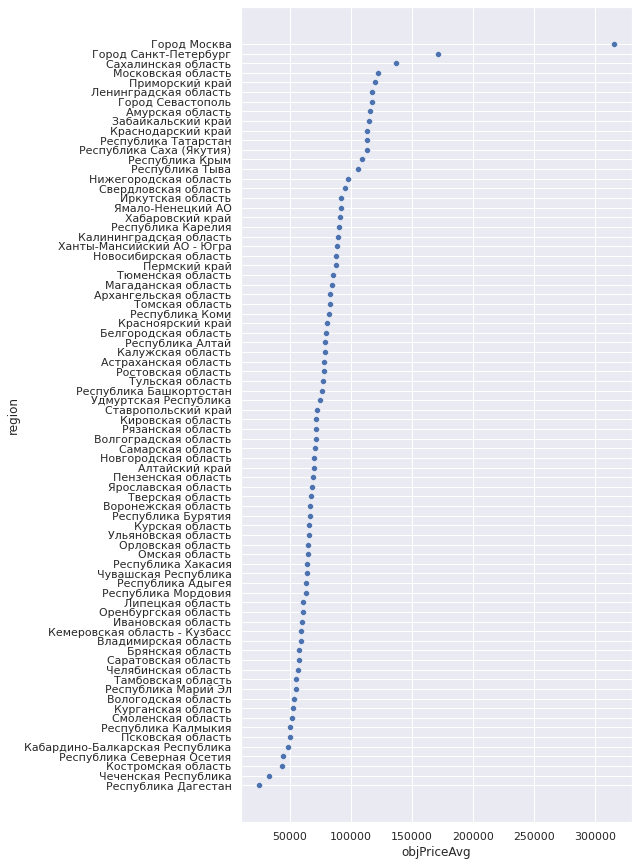

In [20]:
test.make_scatterplot('region','objPriceAvg',input('Сгруппировать по регионам? - y/n '))

Сгруппировать по дополнительному столбцу? - y/n n


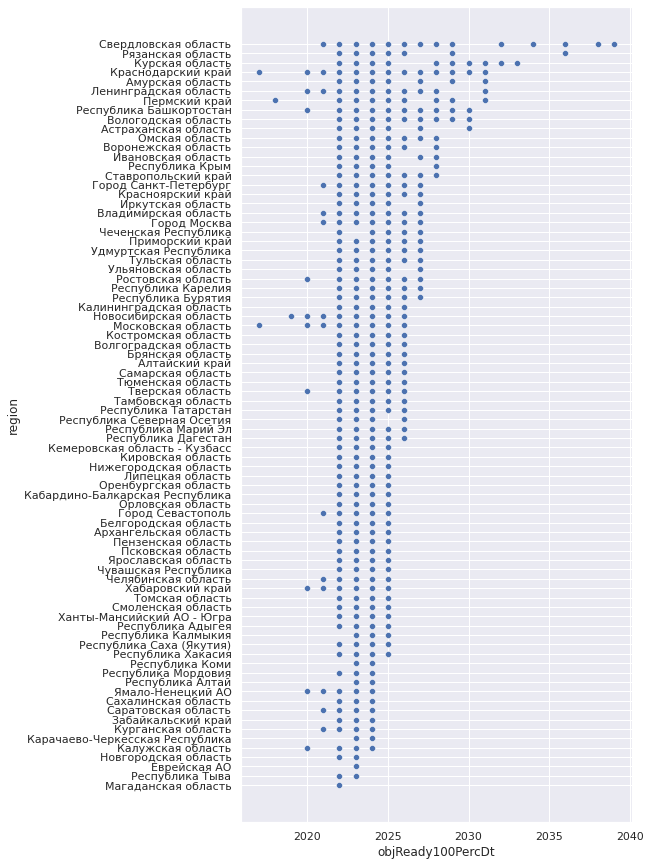

In [22]:
test.make_scatterplot_with_count('region','objReady100PercDt',input('Сгруппировать по дополнительному столбцу? - y/n '))

Сгруппировать по дополнительному столбцу? - y/n y
По какому столбцу сортировать? objReady100PercDt


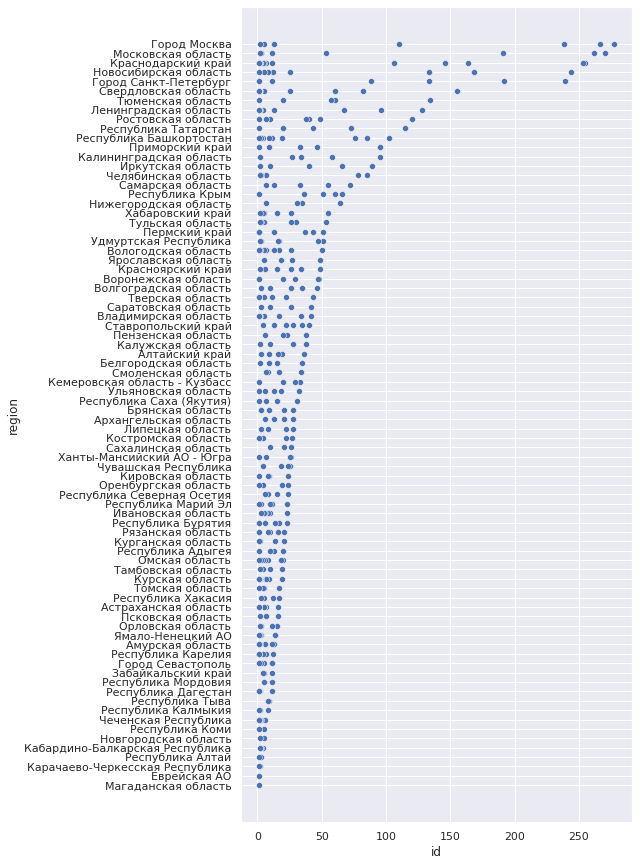

In [23]:
test.make_scatterplot_with_count('region','id',input('Сгруппировать по дополнительному столбцу? - y/n '))

Сгруппировать по дополнительному столбцу? - y/n y
По какому столбцу сортировать? objReady100PercDt


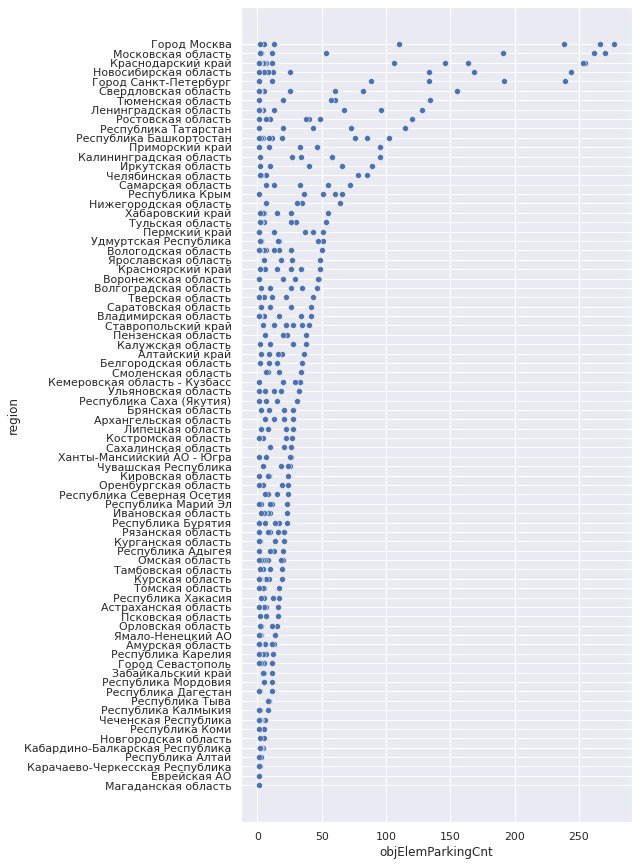

In [26]:
test.make_scatterplot_with_count('region','objElemParkingCnt',input('Сгруппировать по дополнительному столбцу? - y/n '))

Сгруппировать по дополнительному столбцу? - y/n y
По какому столбцу сортировать? objReady100PercDt


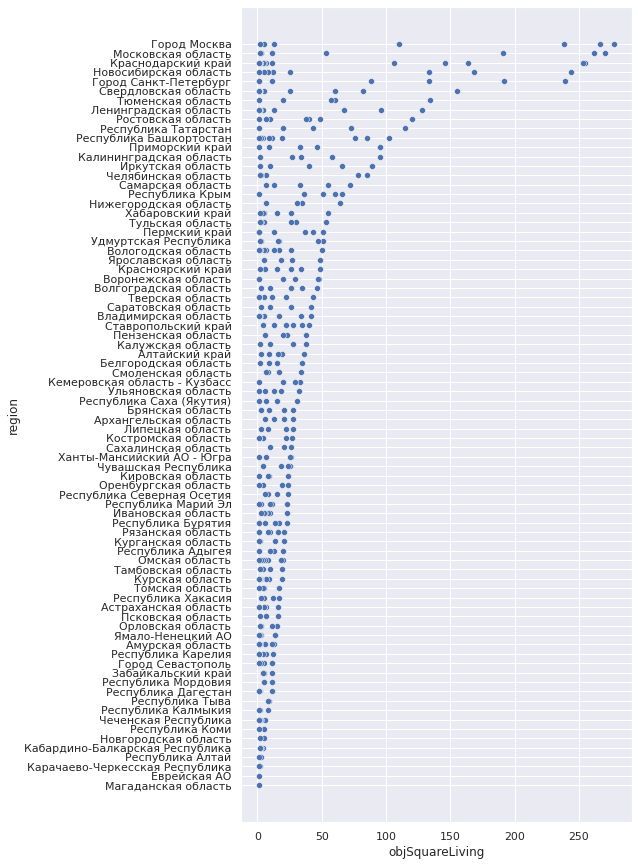

In [27]:
test.make_scatterplot_with_count('region','objSquareLiving',input('Сгруппировать по дополнительному столбцу? - y/n '))

Сгруппировать по дополнительному столбцу? - y/n n


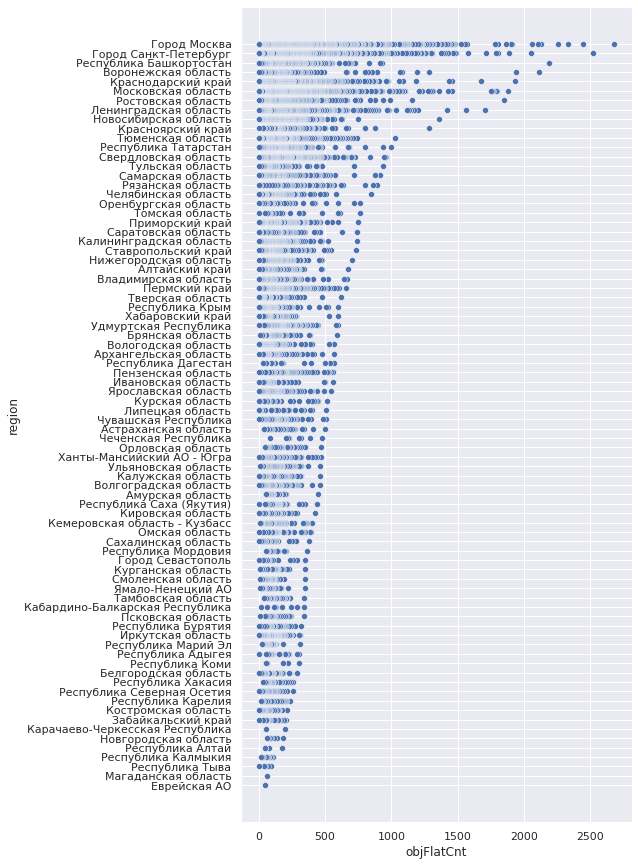

In [29]:
test.make_scatterplot_with_count('region','objFlatCnt',input('Сгруппировать по дополнительному столбцу? - y/n '))

Сгруппировать по дополнительному столбцу? - y/n n


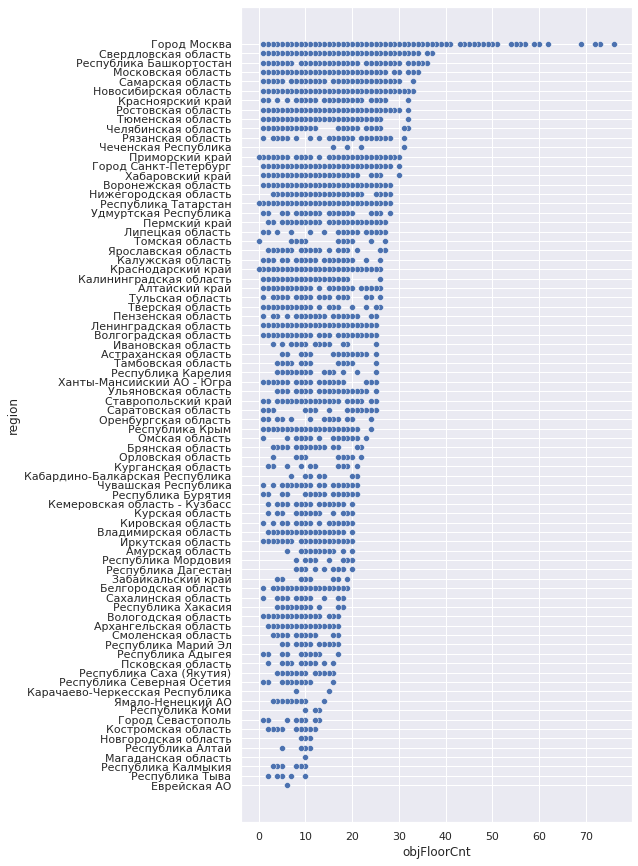

In [30]:
test.make_scatterplot_with_count('region','objFloorCnt',input('Сгруппировать по дополнительному столбцу? - y/n '))